# 4. Histograms and HSV images

## 4.1 Histograms

You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (*ranging from 0 to 255, not always*) in X-axis and corresponding number of pixels in the image on Y-axis.

### Load images as in previous notebooks

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('imgs/69.jpeg')
image_copy = image.copy()
# RGB to BGR
image_BGR = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
# image_RGB = image
image_gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'original')

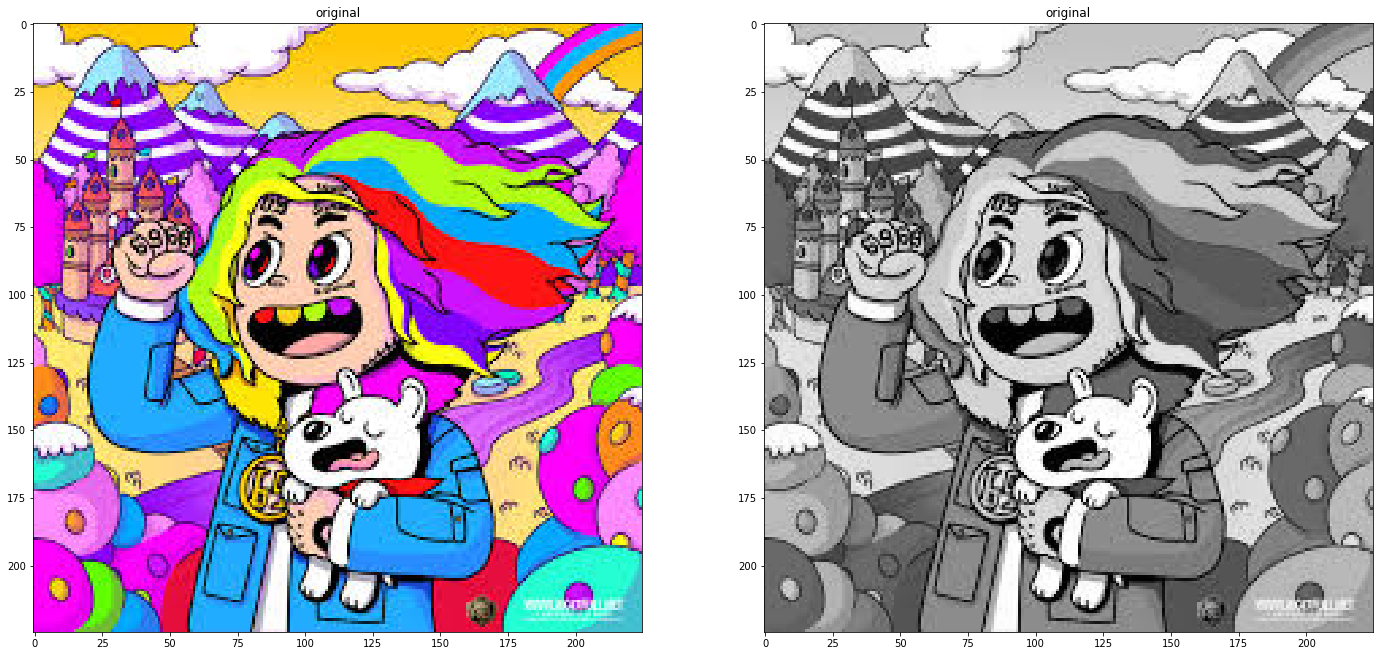

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(24,12))

# Color image
axes[0].imshow(image_BGR)
axes[0].set_title('original')
axes[1].imshow(image_gray, cmap = 'gray')
axes[1].set_title('original')

### Histogram in MatPlotLib

`Matplotlib` has its own histogram function, `hist()`. The function returns all points needed to graph it. 

`histo = cv2.calcHist(image, channel. mask, BINcount, range)`

As we are using RGB in the original picture, remember it is formed by 3 matrix(R,G and B), and 
 histograms, one for each channel, are needed.



Text(0.5, 1.0, 'BGR hist')

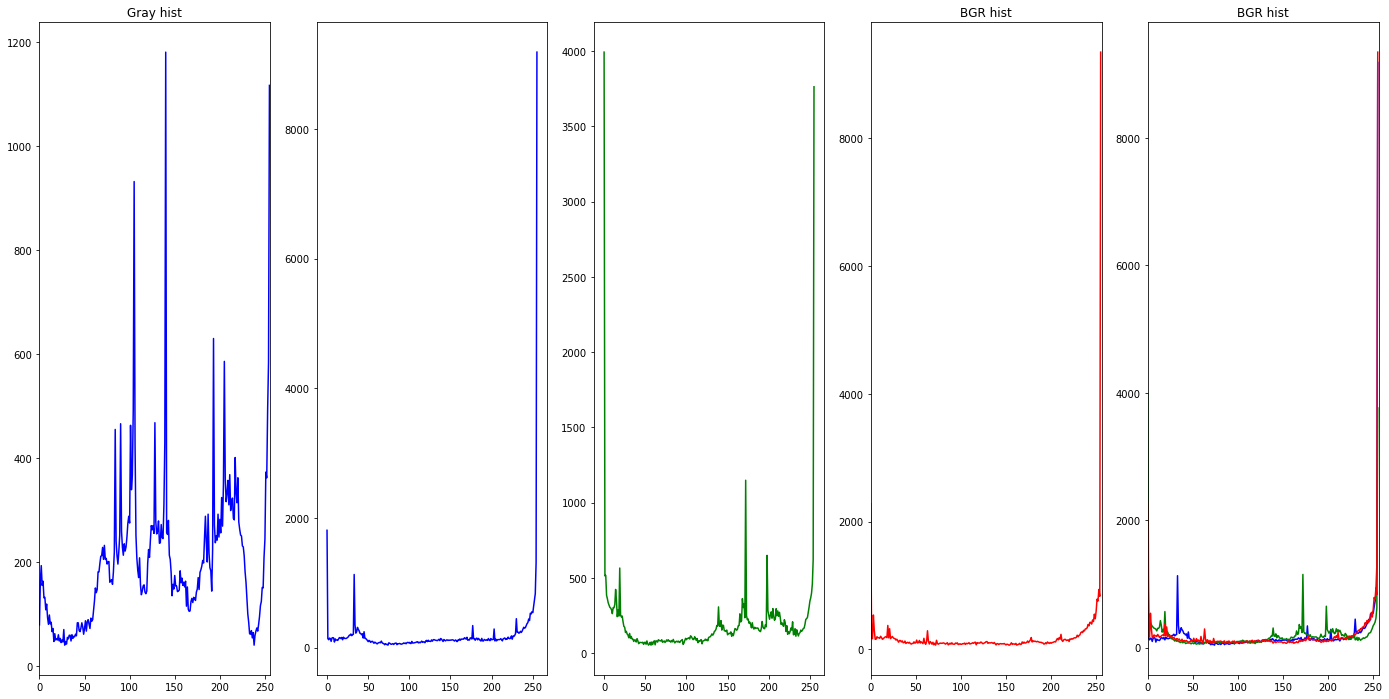

In [4]:
# create figure
fig, axes = plt.subplots(1, 5, figsize=(24, 12))

# Obtain the histogram and store it in a variable. 
histo = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
axes[0].plot(histo, color = 'b') # Select the graph color
axes[0].set_title('Gray hist')
axes[0].axis(xmin=0, xmax=256)



# With a loop, make one histogram for each channel and graph it with the proper color
color = ('b', 'g', 'r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image_BGR], [i], None, [256], [0, 256])
    axes[i+1].plot(histr, color = col)
axes[i+1].axis(xmin=0, xmax=256)
axes[i+1].set_title('BGR hist')


for i,col in enumerate(color):
    histr = cv2.calcHist([image_BGR], [i], None, [256], [0, 256])
    axes[4].plot(histr, color = col)
axes[4].axis(xmin=0, xmax=256)
axes[4].set_title('BGR hist')



### Histogram equalization

For good segmentation, images with high contrast are preferable. Histogram can be equalized for that.


[]

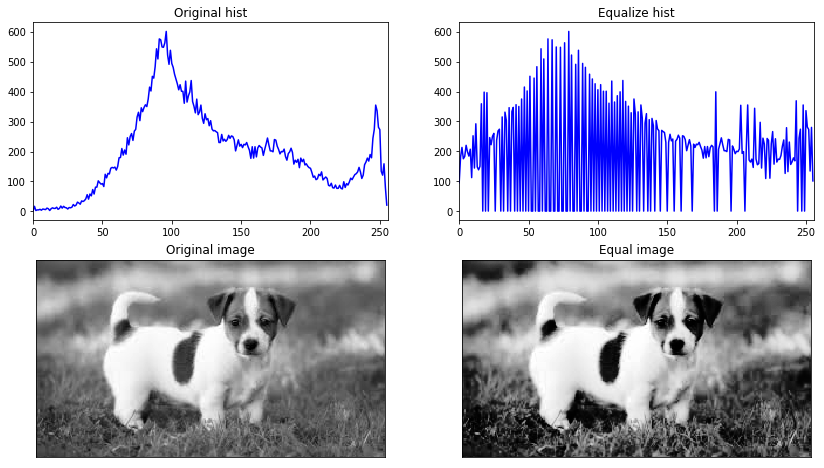

In [5]:
image = cv2.imread('imgs/perro.jpeg')
image_copy = image.copy()
# RGB to BGR
image_BGR = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
# image_RGB = image
image_gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)



histr = cv2.calcHist([image_gray], [0], None, [256], [0,256])

# Equalized hist
equal_image = cv2.equalizeHist(image_gray)
equal_histr = cv2.calcHist([equal_image], [0], None, [256], [0,256])


# Representation
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

axes[0][0].plot(histr,color = 'b')
axes[0][0].set_title('Original hist')
axes[0][0].axis(xmin=0, xmax=256)

axes[0][1].plot(equal_histr, color = 'b')
axes[0][1].set_title('Equalize hist')
axes[0][1].axis(xmin=0, xmax=256)

axes[1][0].imshow(image_gray, cmap='gray')
axes[1][0].set_title('Original image')
axes[1][1].imshow(equal_image, cmap='gray')
axes[1][1].set_title('Equal image')

axes[1][0].set_xticks([])
axes[1][0].set_yticks([])
axes[1][1].set_xticks([])
axes[1][1].set_yticks([])

## HSV 

HSV stands fore Hue Saturation Value. It is also called HSB (Hue Saturation Brightness).

**values**
* H:  0-179
* S:  0-255
* V:  0-255

**_Advantages_**: HSV separates color in one channel (matrix), H. This is as huge advantage coming from RGB that color is a mix of the 3 matrices.


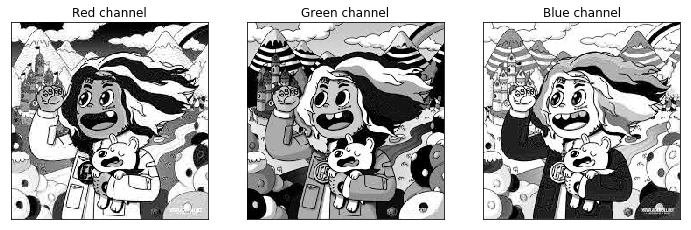

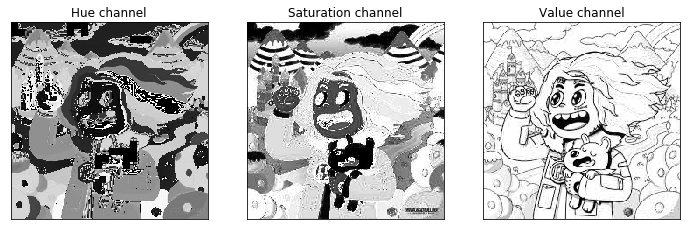

In [6]:
sixtynine = cv2.imread('imgs/69.jpeg')
image_BGR = cv2.cvtColor(sixtynine, cv2.COLOR_RGB2BGR) 


hsv = cv2.cvtColor(sixtynine, cv2.COLOR_BGR2HSV)
hue = hsv [:,:,0] # Hue channel
fig, axes = plt.subplots(1, 3, figsize=(12, 12))


axes[0].imshow(sixtynine[:, :, 0],cmap='gray')
axes[0].set_title('Red channel')
axes[1].imshow(sixtynine[:, :, 1], cmap='gray')
axes[1].set_title('Green channel')
axes[2].imshow(sixtynine[:, :, 2],cmap='gray')
axes[2].set_title('Blue channel')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

    
    
fig, axes = plt.subplots(1,3, figsize=(12, 12))
axes[0].imshow(hsv[:, :, 0], cmap='gray')
axes[0].set_title('Hue channel')
axes[1].imshow(hsv[:, :, 1], cmap='gray')
axes[1].set_title('Saturation channel')
axes[2].imshow(hsv[:, :, 2], cmap='gray')
axes[2].set_title('Value channel')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])


## ROI - Region Of Interest 

It is time to talk about ROI, Region Of Interest.

Sometimes, we will like to extract just a part of an image, determined by its color, shape...

In the next block, It is showed how to extract the blue color from our original BGR picture.

**Steps to follow**:
1. Take blue channel (matrix) from BGR picture and aply a filter to it. It will be the Mask.
2. Apply `bitwise_and` to BGR picture using blue channel filtered as mask.
3. Show masked image.

**_NOTE:_** It is performed  using BGR. Later (jut after this next block) it will be showed how it is done with HSV.

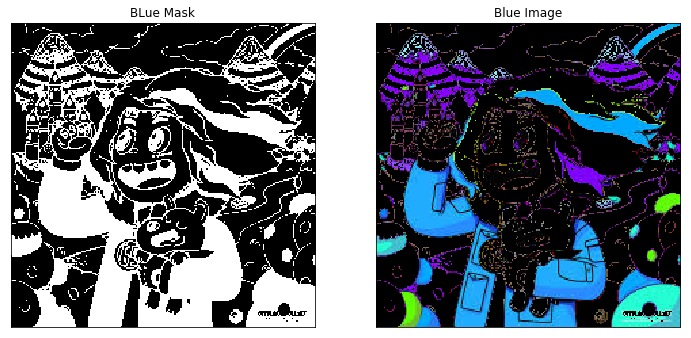

In [7]:
# take blue channel pixels with values between 0 and 150
mask_blue = cv2.inRange(image_BGR[:,:,0], 0, 150) 

img_blue = cv2.bitwise_and(image_BGR,image_BGR,mask = mask_blue)
    
# Plot images    
fig, axes = plt.subplots(1,2, figsize=(12, 12))
axes[0].imshow(mask_blue , cmap='gray')
axes[0].set_title('BLue Mask')
axes[1].imshow(img_blue)
axes[1].set_title('Blue Image')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])




Now, it will be perfomed using HSV, following the same steps as before.



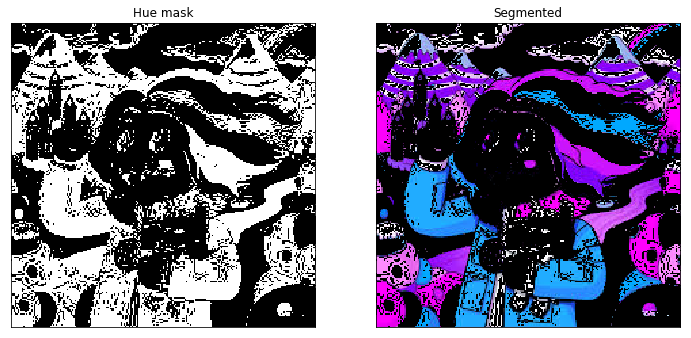

In [8]:

maskHSV = cv2.inRange(hue, 100, 150)
color_filtred = cv2.bitwise_and(image_BGR, image_BGR, mask = maskHSV)

# Represent with matplotlib the image. We can obtain his pixel values and coordinates.
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].imshow(maskHSV,cmap = 'gray')
axes[0].set_title('Hue mask')
axes[1].imshow(color_filtred)
axes[1].set_title('Segmented')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])